# Run Your Sklearn Code 100X Faster
- Medium Blog Link: https://towardsdatascience.com/one-line-of-code-to-accelerate-your-sklearn-algorithms-on-big-data-9c26190a0dc5
- Author: [Jinhang Jiang](https://www.linkedin.com/in/jinhangjiang/)
- Reference: https://intel.github.io/scikit-learn-intelex/

### Install Package

In [31]:
!pip install scikit-learn-intelex

### Import Necessary Packages

In [1]:
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.datasets import make_classification, make_regression, make_moons
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from xgboost import XGBClassifier

### Random Forest - Regressor

In [2]:
patch_sklearn()
from sklearn.ensemble import RandomForestRegressor

score_1 = []
time_lapse_1 = []

for i in range(1,6):
  print(i)
  X, y = make_regression(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = RandomForestRegressor().fit(X, y)
  toc = time.time()
  score_1.append(model.score(X,y))
  time_lapse_1.append(round(1000*(toc - tic),4))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


1
2
3
4
5


In [3]:
unpatch_sklearn()
from sklearn.ensemble import RandomForestRegressor

score_2 = []
time_lapse_2 = []

for i in range(1,6):
  print(i)
  X, y = make_regression(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = RandomForestRegressor(random_state=42).fit(X, y)
  toc = time.time()
  score_2.append(model.score(X,y))
  time_lapse_2.append(round(1000*(toc - tic),4))

1
2
3
4
5


In [4]:
results = pd.DataFrame({'Size':[10**i for i in range(1,6)],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'Speed_X':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)]})

display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),Speed_X
0,10,0.670895,121.4302,0.767732,117.7182,0.9694
1,100,0.914718,64.0523,0.902497,447.5555,6.9873
2,1000,0.924330,440.7175,0.939306,1622.6516,3.6818
3,10000,0.960343,4148.3078,0.961240,22735.4689,5.4807
4,100000,0.970475,48668.0329,0.971543,327640.6515,6.7322


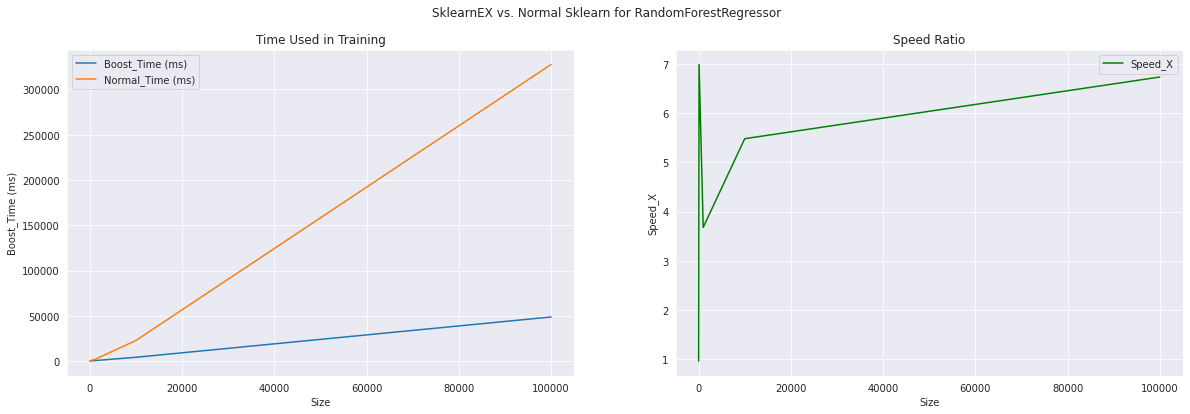

In [5]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for RandomForestRegressor')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X', color='green')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)'])
axes[1].legend(['Speed_X'])

### SVC - Classification

In [37]:
patch_sklearn()
from sklearn.svm import SVC

score_1 = []
time_lapse_1 = []

for i in range(1,6):
  print(i)
  X, y = make_classification(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = SVC(gamma='auto').fit(X, y)
  toc = time.time()
  score_1.append(model.score(X,y))
  time_lapse_1.append(round(1000*(toc - tic),4))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


1
2
3
4
5


In [38]:
unpatch_sklearn()
from sklearn.svm import SVC

score_2 = []
time_lapse_2 = []

for i in range(1,6):
  print(i)
  X, y = make_classification(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = SVC(gamma='auto').fit(X, y)
  toc = time.time()
  score_2.append(model.score(X,y))
  time_lapse_2.append(round(1000*(toc - tic),4))

1
2
3
4
5


In [39]:
results = pd.DataFrame({'Size':[10**i for i in range(1,6)],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'Speed_X':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)]})
display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),Speed_X
0,10,1.00000,109.4353,1.00000,1.375290e+01,0.1257
1,100,1.00000,4.8256,1.00000,1.502300e+00,0.3113
2,1000,1.00000,75.8224,1.00000,1.013458e+02,1.3366
3,10000,1.00000,2656.8675,1.00000,1.901844e+04,7.1582
4,100000,0.99968,154667.0077,0.99968,4.966712e+06,32.1123


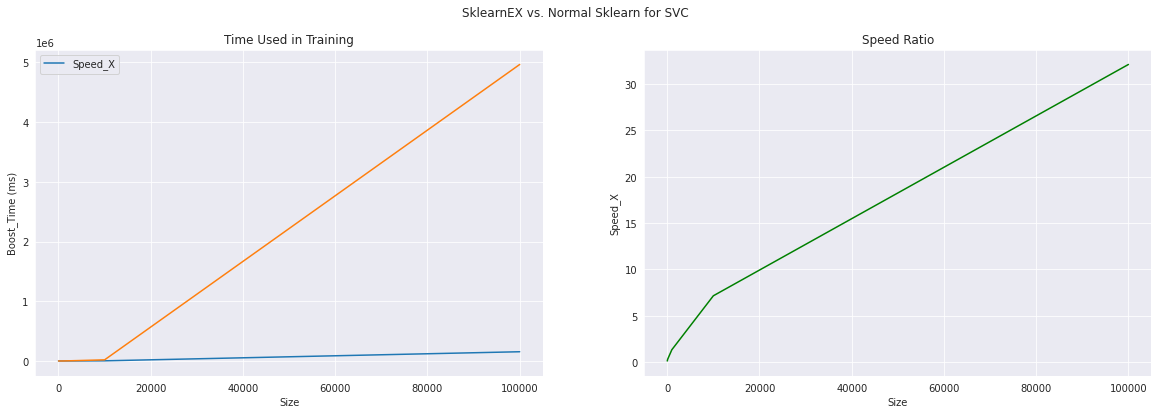

In [40]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for SVC')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X', color='green')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)'])
axes[0].legend(['Speed_X'])

### DBSCAN

In [2]:
score_1 = []
time_lapse_1 = []
score_2 = []
time_lapse_2 = []

for i in [100, 1000, 10000, 75000]:
  print(i)
  patch_sklearn()
  from sklearn.cluster import DBSCAN
  X, y = make_moons(n_samples = i, noise=0.3, random_state=42)
  tic = time.time()
  model = DBSCAN(eps=1).fit_predict(X)
  toc = time.time()
  score_1.append(accuracy_score(y,model))
  time_lapse_1.append(round(1000*(toc - tic),4))

  unpatch_sklearn()
  from sklearn.cluster import DBSCAN
  tic = time.time()
  model = DBSCAN(eps=1).fit_predict(X)
  toc = time.time()
  score_2.append(accuracy_score(y,model))
  time_lapse_2.append(round(1000*(toc - tic),4))

100
1000
10000


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


75000


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
results = pd.DataFrame({'Size':[100, 1000, 10000, 75000],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'Speed_X':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)]})
display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),Speed_X
0,100,0.5,22.2297,0.5,1.7951,0.0808
1,1000,0.5,9.9516,0.5,19.0363,1.9129
2,10000,0.5,581.4903,0.5,1007.3109,1.7323
3,75000,0.5,31517.9791,0.5,43770.6676,1.3888


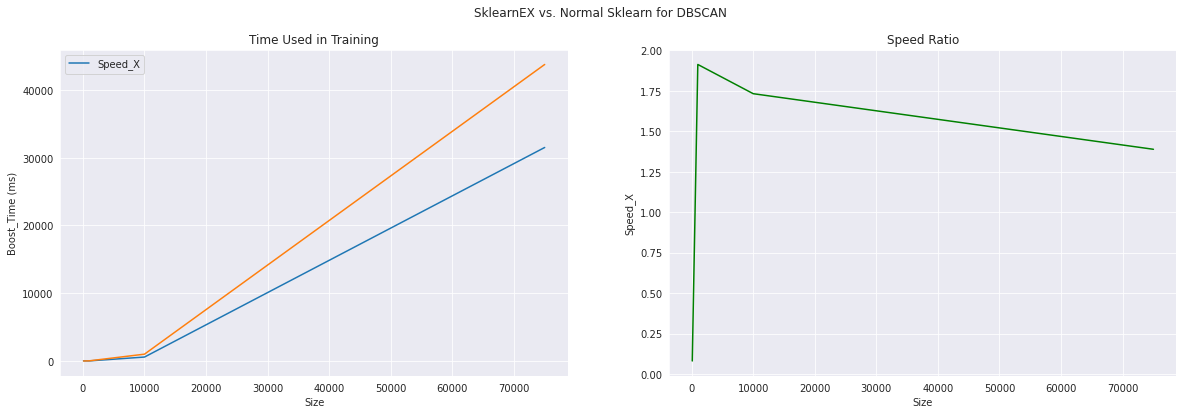

In [4]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for DBSCAN')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X', color='green')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)'])
axes[0].legend(['Speed_X'])

### Random Forest vs. XGBoost

In [8]:
score_1 = []
time_lapse_1 = []
score_2 = []
time_lapse_2 = []
score_3 = []
time_lapse_3 = []

for i in range(1,6):
  print(i)
  patch_sklearn()
  from sklearn.ensemble import RandomForestClassifier
  X, y = make_classification(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = RandomForestClassifier(random_state = 42).fit(X, y)
  toc = time.time()
  score_1.append(accuracy_score(y,model.predict(X)))
  time_lapse_1.append(round(1000*(toc - tic),4))

  unpatch_sklearn()
  from sklearn.ensemble import RandomForestClassifier
  tic = time.time()
  model = RandomForestClassifier(random_state=42).fit(X, y)
  toc = time.time()
  score_2.append(model.score(X,y))
  time_lapse_2.append(round(1000*(toc - tic),4))


  tic = time.time()
  model = XGBClassifier(random_state = 42).fit(X, y)
  toc = time.time()
  score_3.append(model.score(X,y))
  time_lapse_3.append(round(1000*(toc - tic),4))


1
2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


4


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


5


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
results = pd.DataFrame({'Size':[10**i for i in range(1,6)],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'XGB_Score':score_3, 
              'XGB_Time (ms)':time_lapse_3,
              'Speed_X_RR':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)],
              'Speed_X_RX':[round(a/b,4) for a,b in zip(time_lapse_3,time_lapse_1)],
              'Speed_X_XR':[round(a/b,4) for a,b in zip(time_lapse_3,time_lapse_2)]})
display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),XGB_Score,XGB_Time (ms),Speed_X_RR,Speed_X_RX,Speed_X_XR
0,10,1.0,32.2576,1.0,124.6531,1.00000,11.3595,3.8643,0.3521,0.0911
1,100,1.0,40.0150,1.0,145.0255,1.00000,30.9222,3.6243,0.7728,0.2132
2,1000,1.0,94.8870,1.0,446.7397,0.98000,231.6270,4.7081,2.4411,0.5185
3,10000,1.0,681.3552,1.0,4788.4700,0.92370,2155.8199,7.0279,3.1640,0.4502
4,100000,1.0,6790.6065,1.0,71445.8275,0.87299,24329.9601,10.5213,3.5829,0.3405


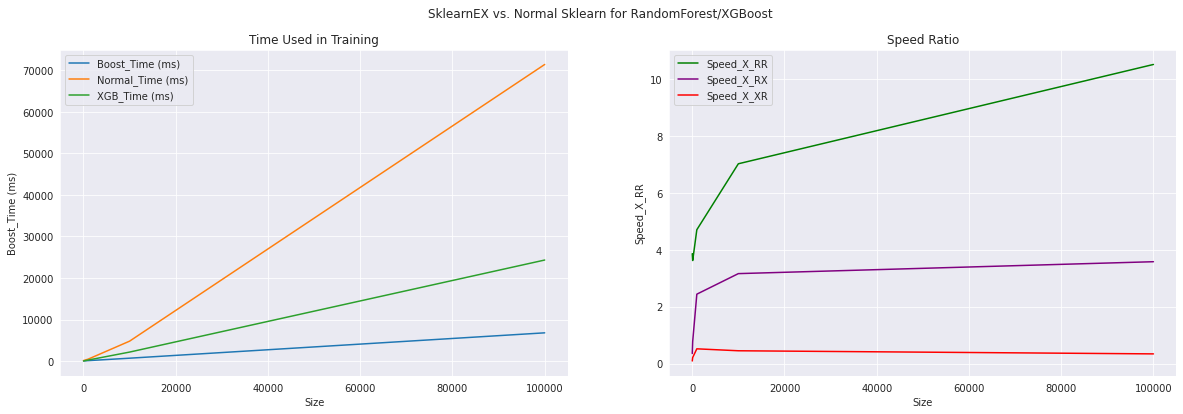

In [10]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for RandomForest/XGBoost')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='XGB_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X_RR', color='green')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X_RX', color='purple')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X_XR', color='red')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)', 'XGB_Time (ms)'])
axes[1].legend(['Speed_X_RR','Speed_X_RX','Speed_X_XR'])